In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest 

In [2]:
df = pd.read_csv("CloudWatch_Traffic_Web_Attack.csv")

In [3]:
df

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [5]:
df.isnull().sum()

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


In [8]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [9]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [10]:
df['creation_time']

0     2024-04-25 23:00:00+00:00
1     2024-04-25 23:00:00+00:00
2     2024-04-25 23:00:00+00:00
3     2024-04-25 23:00:00+00:00
4     2024-04-25 23:00:00+00:00
                 ...           
277   2024-04-26 09:50:00+00:00
278   2024-04-26 09:50:00+00:00
279   2024-04-26 09:50:00+00:00
280   2024-04-26 09:50:00+00:00
281   2024-04-26 09:50:00+00:00
Name: creation_time, Length: 282, dtype: datetime64[ns, UTC]

In [11]:
df['end_time'] 

0     2024-04-25 23:10:00+00:00
1     2024-04-25 23:10:00+00:00
2     2024-04-25 23:10:00+00:00
3     2024-04-25 23:10:00+00:00
4     2024-04-25 23:10:00+00:00
                 ...           
277   2024-04-26 10:00:00+00:00
278   2024-04-26 10:00:00+00:00
279   2024-04-26 10:00:00+00:00
280   2024-04-26 10:00:00+00:00
281   2024-04-26 10:00:00+00:00
Name: end_time, Length: 282, dtype: datetime64[ns, UTC]

In [12]:
# To findout creation duration in seconds
df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()
df['session_duration']

0      600.0
1      600.0
2      600.0
3      600.0
4      600.0
       ...  
277    600.0
278    600.0
279    600.0
280    600.0
281    600.0
Name: session_duration, Length: 282, dtype: float64

In [13]:
# To find Average packet size
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / (df['session_duration'] + 1) # +1 To avoid any error 
df['avg_packet_size']

0         30.935108
1         81.693844
2         69.840266
3         74.582363
4         33.973378
           ...     
277       90.708819
278       11.361065
279    44540.788686
280       29.700499
281       24.782030
Name: avg_packet_size, Length: 282, dtype: float64

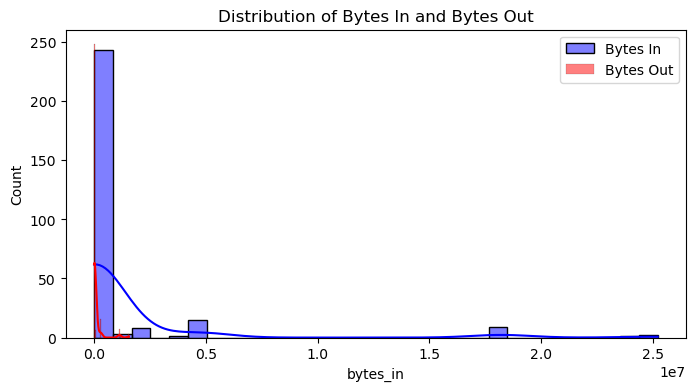

In [14]:
# Weight of the traffic (Distribution Plot)
plt.figure(figsize=(8,4))
sns.histplot(df['bytes_in'], bins=30, color='blue', kde=True, label='Bytes In')
sns.histplot(df['bytes_out'], bins=30, color='red', kde=True, label='Bytes Out')
plt.title('Distribution of Bytes In and Bytes Out') 
plt.legend()
plt.show() 

In [15]:
df[['bytes_in', 'bytes_out']].describe()

,bytes_in,bytes_out
count,2.820000e+02,2.820000e+02
mean,1.199390e+06,8.455429e+04
std,4.149312e+06,2.549279e+05
min,4.000000e+01,4.400000e+01
25%,5.381500e+03,1.114200e+04
50%,1.318200e+04,1.379950e+04
75%,3.083300e+04,2.627950e+04
max,2.520779e+07,1.561220e+06


In [16]:
correlation = df['bytes_in'].corr(df['bytes_out'])
print(f"Correlation between Bytes In and Out: {correlation}")

Correlation between Bytes In and Out: 0.9977049510203999


In [17]:
suspicious_activity = df[df['bytes_in'] > 1.5] # Example threshold
print(suspicious_activity)

     bytes_in  bytes_out             creation_time                  end_time  \
0        5602      12990 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
1       30912      18186 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
2       28506      13468 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
3       30546      14278 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
4        6526      13892 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
..        ...        ...                       ...                       ...   
277     41336      13180 2024-04-26 09:50:00+00:00 2024-04-26 10:00:00+00:00   
278      3638       3190 2024-04-26 09:50:00+00:00 2024-04-26 10:00:00+00:00   
279  25207794    1561220 2024-04-26 09:50:00+00:00 2024-04-26 10:00:00+00:00   
280      5736      12114 2024-04-26 09:50:00+00:00 2024-04-26 10:00:00+00:00   
281      9032       5862 2024-04-26 09:50:00+00:00 2024-04-26 10:00:00+00:00   

              src_ip src_ip_country_cod

In [18]:
# Which country is getting the most suspicious traffic.
country_counts = suspicious_activity['src_ip_country_code'].value_counts()
print("Top Suspicious Countries:\n", country_counts)
# Which protocol are used?
protocol_counts = suspicious_activity['protocol'].value_counts()
print("\nMost Used Protocols:\n", protocol_counts)

Top Suspicious Countries:
 src_ip_country_code
US    113
CA     72
DE     28
AT     21
NL     18
AE     16
IL     14
Name: count, dtype: int64

Most Used Protocols:
 protocol
HTTPS    282
Name: count, dtype: int64


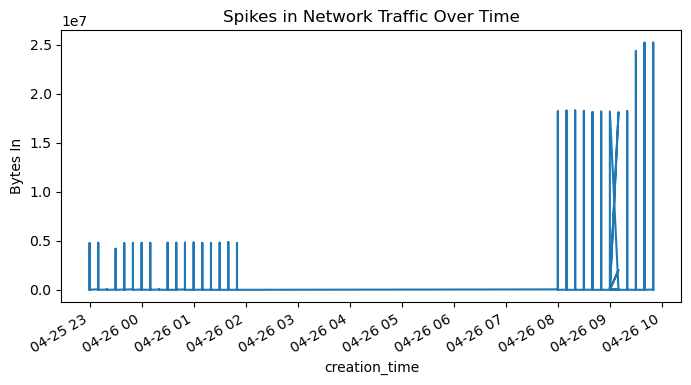

In [19]:
# convert Time to datetime format 
suspicious_activity['creation_time'] = pd.to_datetime(suspicious_activity['creation_time'])
suspicious_activity.set_index('creation_time')['bytes_in'].plot(figsize=(8,4), title='Spikes in Network Traffic Over Time')
plt.ylabel('Bytes In')
plt.show()

Detailed Country Threat Analysis:
                     count          mean       max
src_ip_country_code                               
US                     113  2.800113e+06  25207794
NL                      18  1.091090e+06   2021960
CA                      72  2.170333e+04     57462
DE                      28  1.010857e+04     17748
AE                      16  7.775000e+03     26354
AT                      21  6.833905e+03     10222
IL                      14  4.436857e+03      7786


C:\Users\shrut\AppData\Local\Temp\ipykernel_17624\3750063684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_analysis.index, y=country_analysis['mean'], palette='Reds_r')


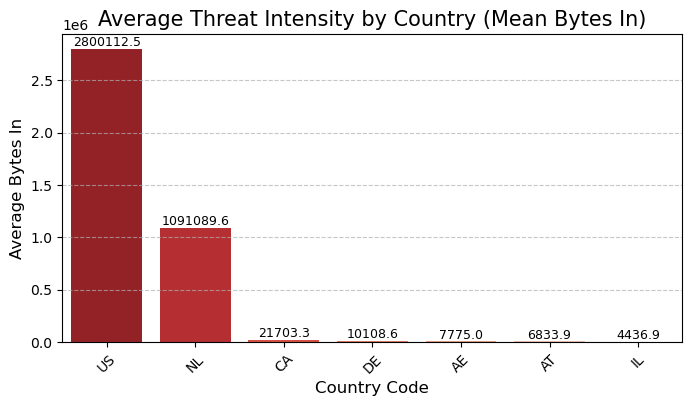

In [20]:
# Too see the average bytes_in for each country.
country_analysis = suspicious_activity.groupby('src_ip_country_code')['bytes_in'].agg(['count', 'mean', 'max']).sort_values(by='mean', ascending=False)
print("Detailed Country Threat Analysis:")
print(country_analysis)
plt.figure(figsize=(8, 4))
sns.barplot(x=country_analysis.index, y=country_analysis['mean'], palette='Reds_r')
plt.title('Average Threat Intensity by Country (Mean Bytes In)', fontsize=15)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Average Bytes In', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(country_analysis['mean']):
    plt.text(i, value, f'{value:.1f}', ha='center', va='bottom', fontsize=9)
plt.show()

C:\Users\shrut\AppData\Local\Temp\ipykernel_17624\3571842749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


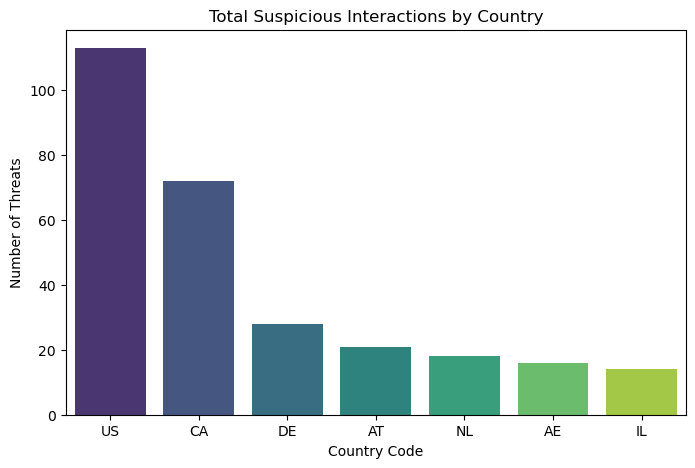

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Total Suspicious Interactions by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Threats')
plt.show()

Top 5 Malicious IP Addresses:
 src_ip
155.91.45.242      314710879
165.225.240.79      19639612
136.226.67.101        664597
136.226.64.114        579830
165.225.212.255       484106
Name: bytes_in, dtype: int64


C:\Users\shrut\AppData\Local\Temp\ipykernel_17624\3044848006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_attacker.index, y=top_attacker.values, palette='flare')


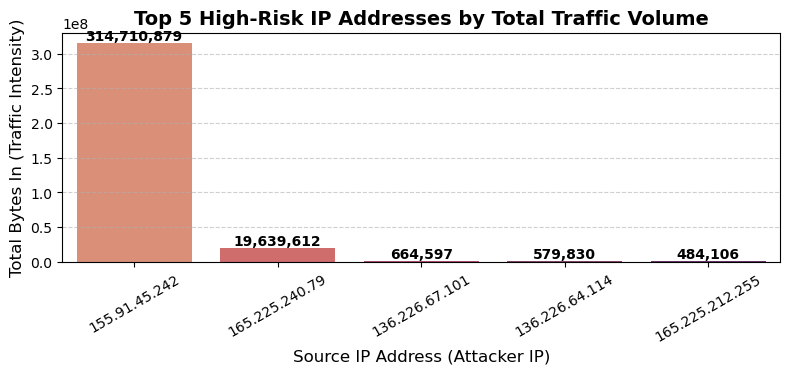

In [22]:
# To find the IP address sending the most traffic
top_attacker = suspicious_activity.groupby('src_ip')['bytes_in'].sum().sort_values(ascending=False).head(5)
print("Top 5 Malicious IP Addresses:\n", top_attacker)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_attacker.index, y=top_attacker.values, palette='flare')
plt.title('Top 5 High-Risk IP Addresses by Total Traffic Volume', fontsize=14, fontweight='bold')
plt.xlabel('Source IP Address (Attacker IP)', fontsize=12)
plt.ylabel('Total Bytes In (Traffic Intensity)', fontsize=12)
plt.xticks(rotation=30) # IPs ko thoda slant karna taaki overlap na ho
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, val in enumerate(top_attacker.values):
    plt.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
# Machine Learning: Isolation Forest (Anomaly Detection)
from sklearn.ensemble import IsolationForest
# To select model
model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = model.fit_predict(df[['bytes_in', 'bytes_out', 'avg_packet_size']])
# -1 it means Anomaly (Threat), 1 for Normal
anomalies = df[df['anomaly_score'] == -1]
print(f"Machine Learning has detected a total {len(anomalies)} threats.")


Machine Learning has detected a total 15 threats.


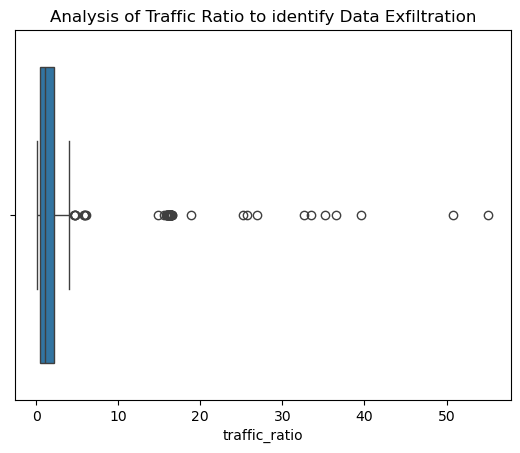

In [24]:
# Feature Engineering 
df['traffic_ratio'] = df['bytes_in'] / (df['bytes_out'] + 1) # +1 to avoid division error 
# for Visualization
import seaborn as sns
sns.boxplot(x=df['traffic_ratio'])
plt.title('Analysis of Traffic Ratio to identify Data Exfiltration')
plt.show()

In [25]:
#Automated Alert System Function
def security_audit_report(data):
    threats = data[data['bytes_in'] > data['bytes_in'].mean() + 3*data['bytes_in'].std()]
    if not threats.empty:
        print(f"🚨 ALERT: {len(threats)} Critical Threats Found!")
        print(f"Top Attacker IP: {threats['src_ip'].iloc[0]}")
    else:
        print("✅ System Secure: No unusual spikes detected.")
security_audit_report(df)

🚨 ALERT: 12 Critical Threats Found!
Top Attacker IP: 155.91.45.242


In [26]:
model = IsolationForest(contamination=0.05, random_state=42)
# Training (Bytes aur Packet size ke base par machine ko sikhana)
# we used features,'bytes_in', 'bytes_out', and 'avg_packet_size' 
df['anomaly_score'] = model.fit_predict(df[['bytes_in', 'bytes_out', 'avg_packet_size']])
print("Machine Learning Detection Results:")
print(df['anomaly_score'].value_counts())

Machine Learning Detection Results:
anomaly_score
 1    267
-1     15
Name: count, dtype: int64


In [27]:
# Filtering the threats detected by AI.
ml_threats = df[df['anomaly_score'] == -1]
# Top IP addresses that are considered threats by AI
print("AI Identified Top Threats:")
print(ml_threats.groupby('src_ip')['bytes_in'].sum().sort_values(ascending=False).head(5))

AI Identified Top Threats:
src_ip
155.91.45.242     216028675
165.225.240.79      3105428
Name: bytes_in, dtype: int64


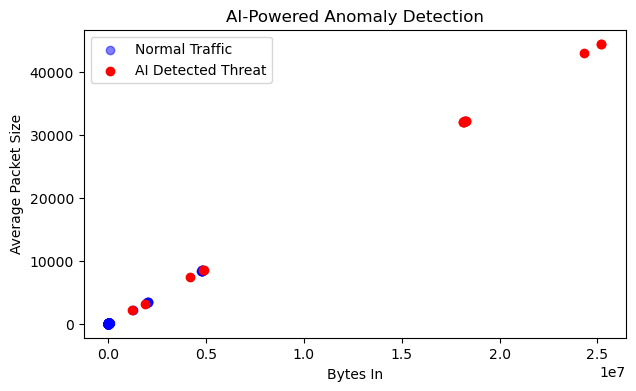

In [28]:
plt.figure(figsize=(7,4))
# Displaying normal data in blue
plt.scatter(df[df['anomaly_score'] == 1]['bytes_in'], df[df['anomaly_score'] == 1]['avg_packet_size'], color='blue', label='Normal Traffic', alpha=0.5)
# Displaying AI-detected threats in red 
plt.scatter(df[df['anomaly_score'] == -1]['bytes_in'], df[df['anomaly_score'] == -1]['avg_packet_size'], color='red', label='AI Detected Threat')
plt.title('AI-Powered Anomaly Detection')
plt.xlabel('Bytes In')
plt.ylabel('Average Packet Size')
plt.legend()
plt.show()

This is the most critical visualization of the project. It shows the final results of our Machine Learning model.
The Blue points represent 'Normal' traffic—these are the safe users who follow standard patterns. 
The Red points are the 'AI-Detected Threats.' These were automatically flagged by the system because their behavior (a combination of high data volume 
and unusual session duration) was statistically impossible for a regular human user. 
This allows security analysts to ignore 90% of the safe logs and focus only on the red flags, saving time and preventing breaches."